<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/simulation/3dgauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Gauss Visualisation

Based on https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb


## Original source code

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

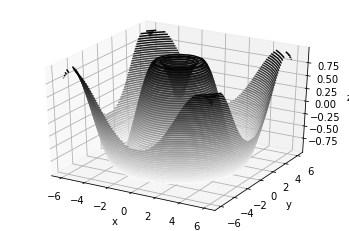

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Gauss visualisation

$$f\left(x\right) = a e^{- { \frac{\left(x-\mu\right)^2 }{ 2 \sigma^2} } }$$

In [45]:
def gaussfunc(x, y):
  avg = (x * x + y * y) / 10
  result = np.exp(-(avg * avg) / 2)
  return result

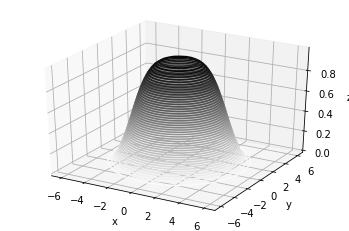

In [46]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = gaussfunc(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [47]:
def gaussCreator(coordX = (-12, 0), coordY = (-6, 6), maxZ = 1):
  xC = (coordX[0] + coordX[1]) / 2
  xK = (coordX[1] - coordX[0]) / 2
  yC = (coordY[0] + coordY[1]) / 2
  yK = (coordY[1] - coordY[0]) / 2
  def gaussfunc(x, y):
    deltaX = (x - np.full_like(x, xC)) / xK 
    deltaY = (y - np.full_like(x, xC)) / yK 
    avg = (deltaX * deltaX + deltaY * deltaY)
    result = np.exp(-(avg * avg) / 2) * maxZ
    return result
  return gaussfunc

In [48]:
x = np.linspace(-12, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
gf = gaussCreator(coordX = (-12, 0), coordY = (-6, 6), maxZ = 1)
Z = gf(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Air to air visibility

In [49]:
import math
# https://cs.wikibooks.org/wiki/Geometrie/Rasterizace
def raster(start = (0, 0), end = (100, 100), xstep = 1, ystep = 1):
  deltax = end[0] - start[0]
  deltay = end[1] - start[1]
  m = (deltay / ystep) / (deltax / xstep) # = deltay * xstep / (deltax * ystep)
  absm = abs(m)
  xa = 1 / absm * xstep # deltax / abs(deltay / ystep)
  ya = absm * ystep #deltay / abs(deltax / xstep)
  #if deltax < 0:
  #  xa = -xa
  #if deltay < 0:
  #  ya = -ya
  #print(m, xa, ya, xstep, ystep)
  if (m >= - 1) & (m <= 1):
    # m in <-1; 1>
    #print('x controls', m, deltax, deltay)
    #print( xa, ya)
    cx = start[0]
    cy = start[1]
    yield cx, cy
    if deltax > 0:
      while cx < end[0]:
        cx = cx + xstep
        cy = cy + ya
        yield cx, cy
    else:
      #print('m <= 0')
      while cx > end[0]:
        cx = cx - xstep
        cy = cy + ya
        yield cx, cy
  else:
    cx = start[0]
    cy = start[1]
    yield cx, cy
    if deltay > 0:
      while cy < end[1]:
        cx = cx + xa
        cy = cy + ystep
        yield cx, cy
    else:
      while cy > end[1]:
        cx = cx + xa
        cy = cy - ystep
        yield cx, cy

def raster(start = (0, 0), end = (100, 100), xstep = 1, ystep = 1):
  deltax = end[0] - start[0]
  deltay = end[1] - start[1]

  nstepsx = int(abs(deltax) / xstep)
  nstepsy = int(abs(deltay) / ystep)
  if (nstepsx > nstepsy): # ridit bude x
    ystepbyx = deltay / nstepsx
    xstepbyx = deltax / nstepsx
    cx = start[0]
    cy = start[1]
    yield cx, cy
    for i in range(nstepsx):
      cx = cx + xstepbyx
      cy = cy + ystepbyx
      yield cx, cy
    
  else: # ridit bude y
    xstepbyy = deltax / nstepsy
    ystepbyy = deltay / nstepsy

    cx = start[0]
    cy = start[1]
    yield cx, cy
    for i in range(nstepsy):
      cx = cx + xstepbyy
      cy = cy + ystepbyy
      yield cx, cy
    pass


In [50]:
rasterized = raster(start = (0, 0), end = (10, 10), xstep = 1, ystep = 0.5)
rasterized = raster(start = (0, 0), end = (10, 10), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 30), end = (0, 0), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 30), end = (0, 0), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (10, 0), end = (0, 10), xstep = 0.5, ystep = 1)
#rasterized = raster(start = (30, 0), end = (0, 10), xstep = 0.5, ystep = 1)
for index, point in enumerate(rasterized):
  print(index, point)

0 (0, 0)
1 (0.5, 0.5)
2 (1.0, 1.0)
3 (1.5, 1.5)
4 (2.0, 2.0)
5 (2.5, 2.5)
6 (3.0, 3.0)
7 (3.5, 3.5)
8 (4.0, 4.0)
9 (4.5, 4.5)
10 (5.0, 5.0)
11 (5.5, 5.5)
12 (6.0, 6.0)
13 (6.5, 6.5)
14 (7.0, 7.0)
15 (7.5, 7.5)
16 (8.0, 8.0)
17 (8.5, 8.5)
18 (9.0, 9.0)
19 (9.5, 9.5)
20 (10.0, 10.0)


In [51]:
def checkVisibility(start = (0, 0), end = (100, 100), z = lambda x, y: 0, xstep = 1, ystep = 1):
  rasterized = raster(start = start, end = end, xstep = xstep, ystep = ystep)
  startZ = z(*start) + 1 # nadmorska vyska pocatku
  endZ = z(*end) + 1 # nadmorska vyska konce
  deltaX = end[0] - start[0]
  deltaY = end[1] - start[1]
  deltaZ = endZ - startZ
  linesightZ = lambda x, y: (x - start[0]) / deltaX * deltaZ + startZ
  result = True
  for index, point in enumerate(rasterized):
    cz = z(*point)
    lsz = linesightZ(*point)
    if lsz < cz:
      result = False
      #print(index, cz, lsz)
      break
  #return True, end
  #print(index, cz, lsz)
  return result, point
  


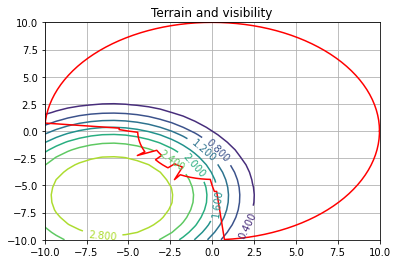

In [54]:
import math
import matplotlib.pyplot as plt

terrain = gaussCreator(maxZ=3)
#terrain = lambda x, y: 0

distance = 10
angle = 0
angleSegments = 256
deltaAngle = 2 * math.pi / angleSegments
borderX = []
borderY = []
for index in range(angleSegments + 1):
  startPoint = (0, 0)
  endPoint = (distance * math.cos(angle), distance * math.sin(angle))
  visible, point = checkVisibility(startPoint, endPoint, terrain)
  borderX.append(point[0])
  borderY.append(point[1])
  angle = angle + deltaAngle

fig, ax = plt.subplots()

ax.plot(borderX, borderY, 'r-')
#print(borderX)
#print(borderY)

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = terrain(X, Y)

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Terrain and visibility')

ax.grid(which='both')
